#import necessary libraries


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pandas as pd

# Load the dataset

In [62]:
df = pd.read_csv("/content/sentiment140.csv")

In [63]:
df.head()

,text,date,user,sentiment,query
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,0.0,NO_QUERY
1,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,0.0,NO_QUERY
2,@Kenichan I dived many times for the ball. Man...,Mon Apr 06 22:19:53 PDT 2009,mattycus,0.0,NO_QUERY
3,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,0.0,NO_QUERY
4,"@nationwideclass no, it's not behaving at all....",Mon Apr 06 22:19:57 PDT 2009,Karoli,0.0,NO_QUERY


# Step 1: Preprocessing

<Axes: xlabel='sentiment', ylabel='count'>

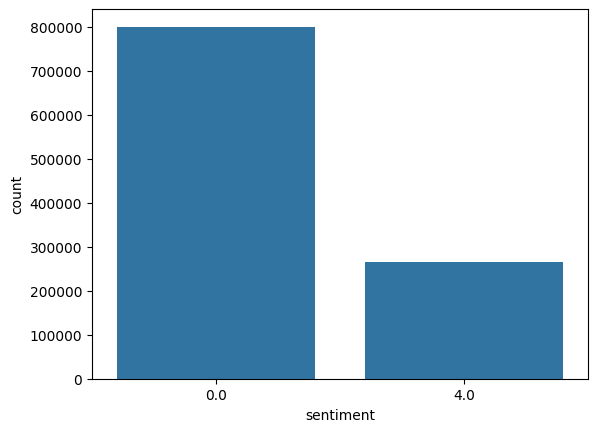

In [65]:
import seaborn as sns
sns.countplot(x="sentiment", data=df)

## Step 1-1: Change the label of positive tweets to 1 and the label of negative tweets to 0


In [66]:
df['sentiment'] = df['sentiment'].replace(4,1)

<Axes: xlabel='sentiment', ylabel='count'>

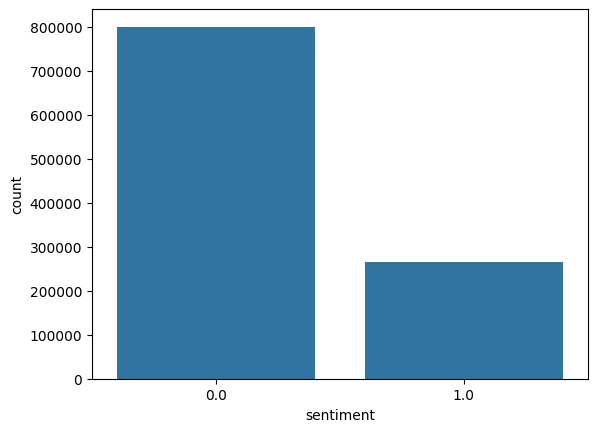

In [67]:
sns.countplot(x="sentiment", data=df)

In [10]:
df.head()

,text,date,user,sentiment,query
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,0,NO_QUERY
1,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,0,NO_QUERY
2,@Kenichan I dived many times for the ball. Man...,Mon Apr 06 22:19:53 PDT 2009,mattycus,0,NO_QUERY
3,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,0,NO_QUERY
4,"@nationwideclass no, it's not behaving at all....",Mon Apr 06 22:19:57 PDT 2009,Karoli,0,NO_QUERY


## Step 1-2: Replace URLs with URL tokens, mentions with MENTION tokens, and hashtags with HASHTAG tokens


In [68]:
import re
def replace_patterns(text):
    text = re.sub(r'http\S+', 'URL', text)
    text = re.sub(r'@\w+', 'MENTION', text)
    text = re.sub(r'#\w+', 'HASHTAG', text)
    return text

df['text'] = df['text'].apply(replace_patterns)

In [69]:
print("After replacing URLs, mentions, and hashtags:")
df.head()

After replacing URLs, mentions, and hashtags:


,text,date,user,sentiment,query
0,"MENTION URL - Awww, that's a bummer. You shou...",Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,0.0,NO_QUERY
1,is upset that he can't update his Facebook by ...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,0.0,NO_QUERY
2,MENTION I dived many times for the ball. Manag...,Mon Apr 06 22:19:53 PDT 2009,mattycus,0.0,NO_QUERY
3,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,0.0,NO_QUERY
4,"MENTION no, it's not behaving at all. i'm mad....",Mon Apr 06 22:19:57 PDT 2009,Karoli,0.0,NO_QUERY


## 1-3 Remove the punctuation marks

In [70]:
import string
df['text'] = df['text'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))

In [71]:
df.head()

,text,date,user,sentiment,query
0,MENTION URL Awww thats a bummer You shoulda ...,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,0.0,NO_QUERY
1,is upset that he cant update his Facebook by t...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,0.0,NO_QUERY
2,MENTION I dived many times for the ball Manage...,Mon Apr 06 22:19:53 PDT 2009,mattycus,0.0,NO_QUERY
3,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,0.0,NO_QUERY
4,MENTION no its not behaving at all im mad why ...,Mon Apr 06 22:19:57 PDT 2009,Karoli,0.0,NO_QUERY


## Step 1-4: Tokenize each tweet into words

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import nltk
nltk.download('punkt', download_dir='/content/nltk_data')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [72]:
# import nltk
# nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df['tokens'] = df['text'].apply(word_tokenize)

In [73]:
print("After tokenization:")
df.head()

After tokenization:


,text,date,user,sentiment,query,tokens
0,MENTION URL Awww thats a bummer You shoulda ...,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,0.0,NO_QUERY,"[MENTION, URL, Awww, thats, a, bummer, You, sh..."
1,is upset that he cant update his Facebook by t...,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,0.0,NO_QUERY,"[is, upset, that, he, cant, update, his, Faceb..."
2,MENTION I dived many times for the ball Manage...,Mon Apr 06 22:19:53 PDT 2009,mattycus,0.0,NO_QUERY,"[MENTION, I, dived, many, times, for, the, bal..."
3,my whole body feels itchy and like its on fire,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,0.0,NO_QUERY,"[my, whole, body, feels, itchy, and, like, its..."
4,MENTION no its not behaving at all im mad why ...,Mon Apr 06 22:19:57 PDT 2009,Karoli,0.0,NO_QUERY,"[MENTION, no, its, not, behaving, at, all, im,..."


## Step 1-5: Perform lemmatization

In [19]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [74]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [75]:
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

## Step 1-6: Display the first 20 tweets


In [22]:
print("First 20 tweets after preprocessing:")
for i in range(20):
    print(i, df['tokens'][i])

First 20 tweets after preprocessing:
0 ['MENTION', 'URL', 'Awww', 'thats', 'a', 'bummer', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', 'D']
1 ['is', 'upset', 'that', 'he', 'cant', 'update', 'his', 'Facebook', 'by', 'texting', 'it', 'and', 'might', 'cry', 'a', 'a', 'result', 'School', 'today', 'also', 'Blah']
2 ['MENTION', 'I', 'dived', 'many', 'time', 'for', 'the', 'ball', 'Managed', 'to', 'save', '50', 'The', 'rest', 'go', 'out', 'of', 'bound']
3 ['my', 'whole', 'body', 'feel', 'itchy', 'and', 'like', 'it', 'on', 'fire']
4 ['MENTION', 'no', 'it', 'not', 'behaving', 'at', 'all', 'im', 'mad', 'why', 'am', 'i', 'here', 'because', 'I', 'cant', 'see', 'you', 'all', 'over', 'there']
5 ['MENTION', 'not', 'the', 'whole', 'crew']
6 ['Need', 'a', 'hug']
7 ['MENTION', 'hey', 'long', 'time', 'no', 'see', 'Yes', 'Rains', 'a', 'bit', 'only', 'a', 'bit', 'LOL', 'Im', 'fine', 'thanks', 'hows', 'you']
8 ['MENTION', 'nope', 'they', 'didnt', 'have', 'it']
9 ['MENTION

## Step 1-7: Split the dataset into 80% training and 20% testing


In [20]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]
unique_tokens = set(all_tokens)
unique_words = list(unique_tokens)


In [76]:
df['length'] = df['tokens'].apply(len)

The cumulative distribution plot help to understand the distribution of tweet lengths in a cumulative manner. By examining this plot, we can determine an appropriate cutoff for the maximum sequence length for padding.

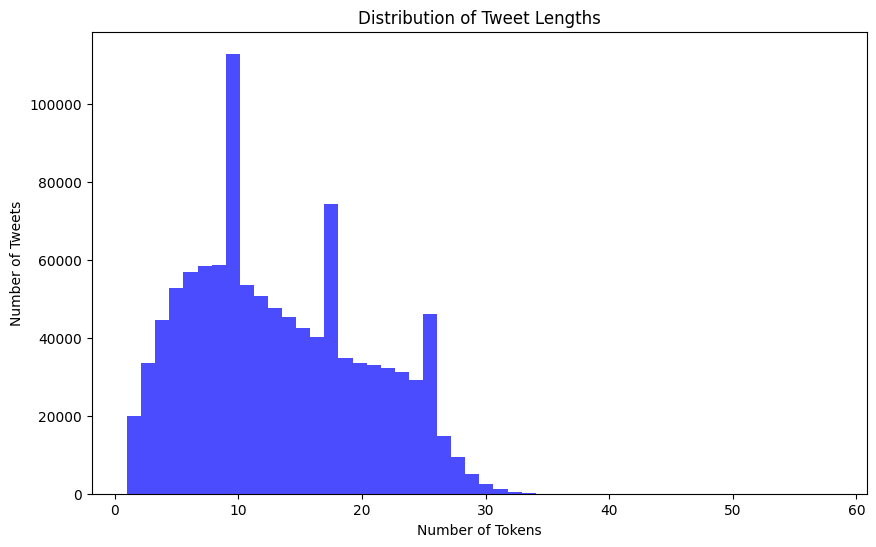

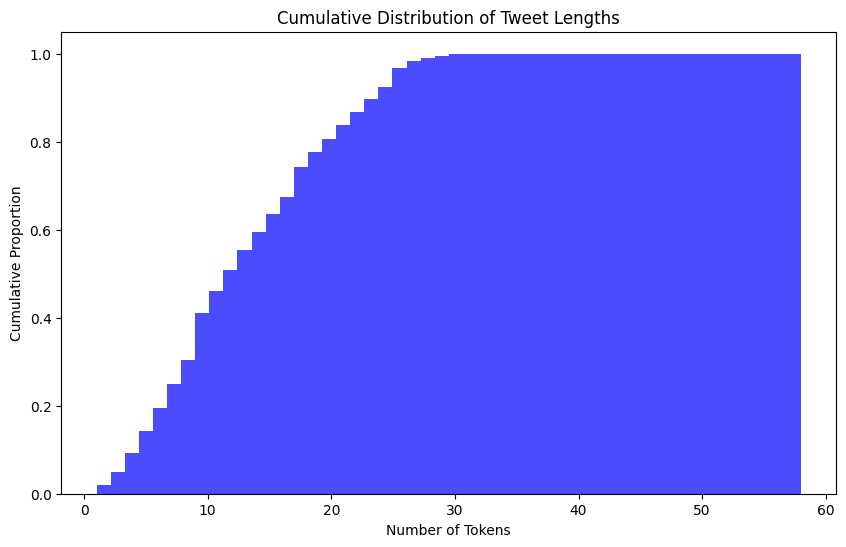

In [77]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Tweets')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=50, color='blue', alpha=0.7, cumulative=True, density=True)
plt.title('Cumulative Distribution of Tweet Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Cumulative Proportion')
plt.show()



In [78]:
max_length = int(df['length'].quantile(0.95))
print(f"maximum sequence length: {max_length}")

maximum sequence length: 26


# Step 3: Word Embedding

In [29]:
# load google news word2vec
import gensim.downloader as api
w2v = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [40]:
dictionary = set()
for word in unique_words:
    if word in w2v:
        dictionary.add(word)
dictionary = list(dictionary)

#Tokenize and vectorization

In [28]:
!pip install tensorflow

Adding 1 because of zero padding

In [80]:
from sklearn.model_selection import train_test_split
X = df['tokens'].values
y = df['sentiment'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [84]:
tokenizer.fit_on_texts(X_train)

In [82]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(vocab_size)

250511


In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
# tokenizer.fit_on_texts(dictionary)

In [85]:
import numpy as np
embedding_dim = 300
embeddings_matrix = np.zeros((vocab_size, embedding_dim))
for word, idx in word_index.items():
    if word in w2v:
        embeddings_matrix[idx] = w2v[word]
    else:
        embeddings_matrix[idx] = np.random.rand(embedding_dim)

In [86]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
# tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')

In [87]:
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

In [88]:
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')

#LSTM Model

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout

In [90]:
import tensorflow as tf

In [95]:
model = Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 26, 300)             │      75,153,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 64)                  │          23,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,176,725 (286.78 MB)

 Trainable params: 23,425 (91.50 KB)

 Non-trainable params: 75,153,300 (286.69 MB)

In [92]:
print("NaN in embeddings_matrix:", np.isnan(embeddings_matrix).any())
print("NaN in X_train_padded:", np.isnan(X_train_padded).any())

NaN in embeddings_matrix: False
NaN in X_train_padded: False


In [93]:
df['sentiment'].value_counts()

,count
sentiment,
0.0,800000
1.0,265672


#Fit model

In [96]:
model1 = model.fit(X_train_padded, y_train, epochs=5, batch_size=512, validation_data=(X_val_padded, y_val))

Epoch 1/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 128s 84ms/step - accuracy: 0.7593 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 2/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 121s 83ms/step - accuracy: 0.7508 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 3/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 131s 76ms/step - accuracy: 0.7499 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 4/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.7506 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 5/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 145s 78ms/step - accuracy: 0.7506 - loss: nan - val_accuracy: 0.7514 - val_loss: nan


# Predict on the test set


In [98]:
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")


4996/4996 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step


In [99]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], labels=np.unique(y_pred), zero_division=1)
print(report)

              precision    recall  f1-score   support

    Negative       0.75      1.00      0.86    119965

   micro avg       0.75      1.00      0.86    119965
   macro avg       0.75      1.00      0.86    119965
weighted avg       0.75      1.00      0.86    119965



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 1, does not match size of target_names, 2
  warnings.warn(


In [100]:
import tensorflow as tf
model1 = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embeddings_matrix], input_length=max_length, trainable=False),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [108]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (32, 26, 300)               │      75,153,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (32, 128)                   │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,373,077 (287.53 MB)

 Trainable params: 219,777 (858.50 KB)

 Non-trainable params: 75,153,300 (286.69 MB)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (32, 26, 300)               │      75,153,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (32, 128)                   │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,373,077 (287.53 MB)

 Trainable params: 219,777 (858.50 KB)

 Non-trainable params: 75,153,300 (286.69 MB)

In [109]:
model2 = model1.fit(X_train_padded, y_train, epochs=5, batch_size=512, validation_data=(X_val_padded, y_val))

Epoch 1/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 614s 420ms/step - accuracy: 0.7502 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 2/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 578s 397ms/step - accuracy: 0.7506 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 3/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 646s 414ms/step - accuracy: 0.7499 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 4/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 605s 415ms/step - accuracy: 0.7505 - loss: nan - val_accuracy: 0.7514 - val_loss: nan
Epoch 5/5
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 615s 422ms/step - accuracy: 0.7506 - loss: nan - val_accuracy: 0.7514 - val_loss: nan


In [110]:
y_pred = (model1.predict(X_test_padded) > 0.5).astype("int32")


4996/4996 ━━━━━━━━━━━━━━━━━━━━ 129s 26ms/step


In [102]:
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], labels=np.unique(y_pred), zero_division=1)
print(report)

              precision    recall  f1-score   support

    Negative       0.77      0.17      0.28    119965
    Positive       0.25      0.85      0.39     39886

    accuracy                           0.34    159851
   macro avg       0.51      0.51      0.33    159851
weighted avg       0.64      0.34      0.31    159851

